In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns


### 1) Delivery_time -> Predict delivery time using sorting time 

In [3]:
delivery_data = pd.read_csv('../Data/delivery_time.csv')
delivery_data.rename(columns = {'Delivery Time' : 'Delivery_Time', 'Sorting Time' : 'Sorting_Time'}, inplace = True)
delivery_data.head(5)

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
delivery_data.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


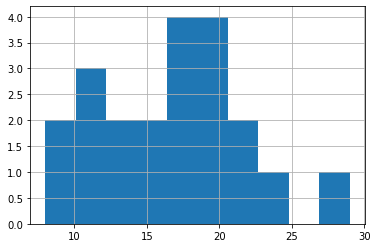

In [6]:
delivery_data['Delivery_Time'].hist()

In [7]:
delivery_data.shape

(21, 2)

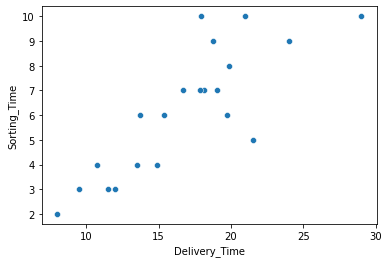

In [8]:
sns.scatterplot(x=delivery_data['Delivery_Time'],y=delivery_data['Sorting_Time'])

In [9]:
delivery_data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


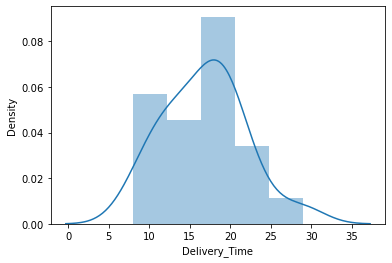

In [10]:
sns.distplot(delivery_data['Delivery_Time'])

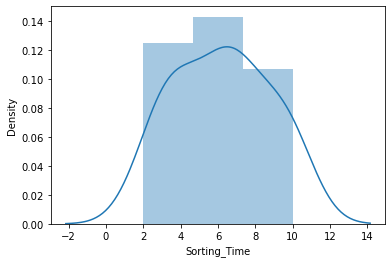

In [11]:
sns.distplot(delivery_data['Sorting_Time'])

In [12]:
import statsmodels.formula.api as smf
delivery_time_model = smf.ols("Delivery_Time~Sorting_Time",data=delivery_data).fit()

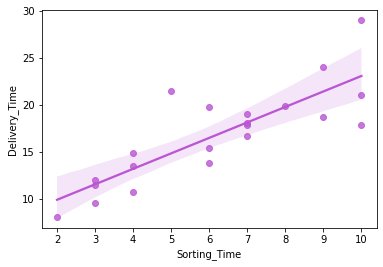

In [13]:
sns.regplot(x='Sorting_Time',y='Delivery_Time',data=delivery_data,color='mediumorchid')

In [14]:
delivery_time_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           3.98e-06
Time:                        22:50:18   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
New_del_time = pd.Series([10,31.5,13.5])

In [16]:
pred_deltime=pd.DataFrame(New_del_time,columns=['Sorting_Time'])
pred_deltime

,Sorting_Time
0,10.0
1,31.5
2,13.5


In [17]:
delivery_time_model.predict(pred_deltime)

0    23.072933
1    58.526861
2    28.844503
dtype: float64

In [24]:
# Z score
from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(delivery_data['Sorting_Time']))
print(z)

[1.53562462 0.88298415 0.07678123 1.13252315 1.53562462 0.07678123
 0.32632023 1.28608562 1.53562462 1.13252315 0.72942169 0.88298415
 0.32632023 1.28608562 1.28608562 0.88298415 0.07678123 0.32632023
 1.68918708 0.32632023 0.47988269]


In [27]:
z < -3

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [19]:
threshold = 3
 
# Position of the outlier
print(np.where(z > 1))

(array([ 3,  4,  7, 11, 13, 18], dtype=int64),)
